In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [4]:
np.load("tmp_314K.npy")

array([ 1.2436e+04, -2.1710e+00])

In [3]:
np.load("tmp_314K.npy")

array([ 1.0673e+04, -1.0700e+00])

In [3]:
np.load("tmp_313K.npy")

array([ 1.1605e+04, -9.5500e-01])

In [4]:
np.load("tmp_313K.npy")

array([ 1.0465e+04, -2.0700e-01])

In [5]:
temps = np.array([280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 
                  290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 
                  300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 
                  310, 311, 312,           315, 316, 317, 318, 319, 320])

0.01 imbalance 280 [9.6]
281 [15]
0.01 imbalance 282 [24.1]
0.01 imbalance 283 [37.]
0.01 imbalance 284 [55.1]
0.01 imbalance 285 [104.9]
0.01 imbalance 286 [150.5]
0.01 imbalance 287 [208.6]
0.01 imbalance 288 [279.5]
0.01 imbalance 289 [363.9]
0.01 imbalance 290 [457.7]
0.01 imbalance 291 [738.5]
0.01 imbalance 292 [915.2]
0.01 imbalance 293 [1106.4]
0.01 imbalance 294 [1307.8]
0.01 imbalance 295 [1500.5]
296 [2180]
0.01 imbalance 297 [2595.]
298 [3009]
299 [3313]
300 [3553]
301 [3705]
302 [5582]
303 [6031]
304 [6379]
305 [6585]
306 [6607]
307 [6420]
308 [10352]
309 [10926]
310 [11303]
311 [11392]
312 [11119]
315 [19238]
316 [22753]
317 [26199]
318 [31033]
319 [37201]
320 [44421]


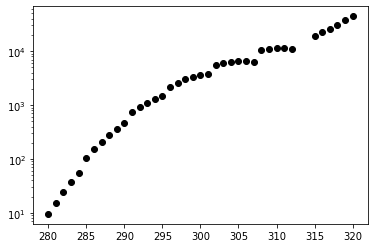

In [6]:
import os

fig, ax = plt.subplots()

for temp in temps:
    if os.path.isfile(f"co2_{temp}K_p01_imbalance.npy"):
        arr = np.load(f"co2_{temp}K_p01_imbalance.npy")
        print("0.01 imbalance", temp, arr)
    else:
        arr = np.load(f"co2_{temp}K.npy")
        print(temp, arr)
        
    ax.scatter(temp, arr, color='k')
    
ax.set_yscale('log')

In [7]:
import pickle

data_path = "../lambdanu_ctrl.pickle"

with open(data_path,mode='rb') as f:
    data = pickle.load(f)

for key,val in data.items():
    exec(key + '=val')

In [12]:
C_Ts = xr.DataArray(dims=['Ts'], coords={'Ts':np.arange(280,326)})


for t in np.arange(280, 326):
    C_Ts.loc[dict(Ts=t)] = lambdanu[t]['co2_ppm']


In [20]:
C_Ts.sel(Ts=320)

<xarray.DataArray ()>
array(73017.82198)
Coordinates:
    Ts       int64 320

0.01 imbalance 280 [9.6]
281 [15]
0.01 imbalance 282 [24.1]
0.01 imbalance 283 [37.]
0.01 imbalance 284 [55.1]
0.01 imbalance 285 [104.9]
0.01 imbalance 286 [150.5]
0.01 imbalance 287 [208.6]
0.01 imbalance 288 [279.5]
0.01 imbalance 289 [363.9]
0.01 imbalance 290 [457.7]
0.01 imbalance 291 [738.5]
0.01 imbalance 292 [915.2]
0.01 imbalance 293 [1106.4]
0.01 imbalance 294 [1307.8]
0.01 imbalance 295 [1500.5]
296 [2180]
0.01 imbalance 297 [2595.]
298 [3009]
299 [3313]
300 [3553]
301 [3705]
302 [5582]
303 [6031]
304 [6379]
305 [6585]
306 [6607]
307 [6420]
308 [10352]
309 [10926]
310 [11303]
311 [11392]
312 [11119]
315 [19238]
316 [22753]
317 [26199]
318 [31033]
319 [37201]
320 [44421]


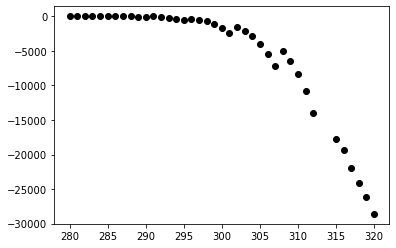

In [19]:
import os

fig, ax = plt.subplots()

for temp in temps:
    if os.path.isfile(f"co2_{temp}K_p01_imbalance.npy"):
        arr = np.load(f"co2_{temp}K_p01_imbalance.npy")
        print("0.01 imbalance", temp, arr)
    else:
        arr = np.load(f"co2_{temp}K.npy")
        print(temp, arr)
        
    #ax.scatter(temp, arr, color='k')
    ax.scatter(temp, arr[0]-C_Ts.sel(Ts=temp), color='k')
    
    
#ax.scatter(C_Ts.Ts, C_Ts, color='red')
#ax.set_yscale('log')